# Decision Trees and Random Forests

In [1]:
library(rpart)

**We can then use the rpart() function to build a decision tree model:**

**rpart(formula, data=, method=,control=) where**
 - the formula is in the format: outcome ~ predictor1+predictor2+predictor3+ect.
 - data= specifies the data frame
 - method= "class" for a classification tree
 - "anova" for a regression tree
 - control= optional parameters for controlling tree growth.
 
  - For example, control=rpart.control(minsplit=30, cp=0.001) requires that the minimum number of observations in a node be 30 before attempting a split and that a split must decrease the overall lack of fit by a factor of 0.001 (cost complexity factor) before being attempted.

**Sample Data**

We'll use the kyphosis data frame which has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. It has the following columns:
 
 - Kyphosis-a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.
 - Age-in months
 - Number-the number of vertebrae involved
 - Start-the number of the first (topmost) vertebra operated on.

In [2]:
str(kyphosis)

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


In [3]:
head(kyphosis)

Kyphosis,Age,Number,Start
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15
absent,1,2,16


In [24]:
tree <- rpart(Kyphosis ~ . , method='class', data= kyphosis)

In [25]:
#printcp(fit) - display cp table

printcp(tree)


Classification tree:
rpart(formula = Kyphosis ~ ., data = kyphosis, method = "class")

Variables actually used in tree construction:
[1] Age   Start

Root node error: 17/81 = 0.20988

n= 81 

        CP nsplit rel error xerror    xstd
1 0.176471      0   1.00000 1.0000 0.21559
2 0.019608      1   0.82353 1.1765 0.22829
3 0.010000      4   0.76471 1.2353 0.23200


### Tree Visualization 

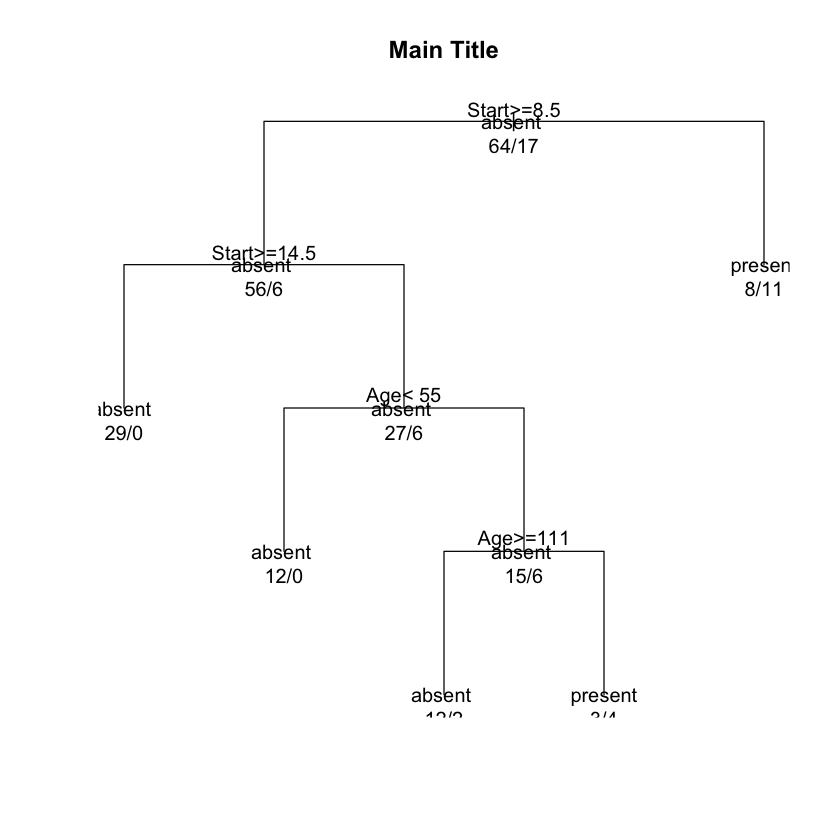

In [26]:
# plot(fit)	plot decision tree
# text(fit)	label the decision tree plot

plot(tree, uniform=TRUE, main="Main Title")
text(tree, use.n=TRUE, all=TRUE)

The rpart.plot library package makes these visualizations much better.

In [27]:
# install.packages('rpart.plot')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [12]:
library(rpart.plot)

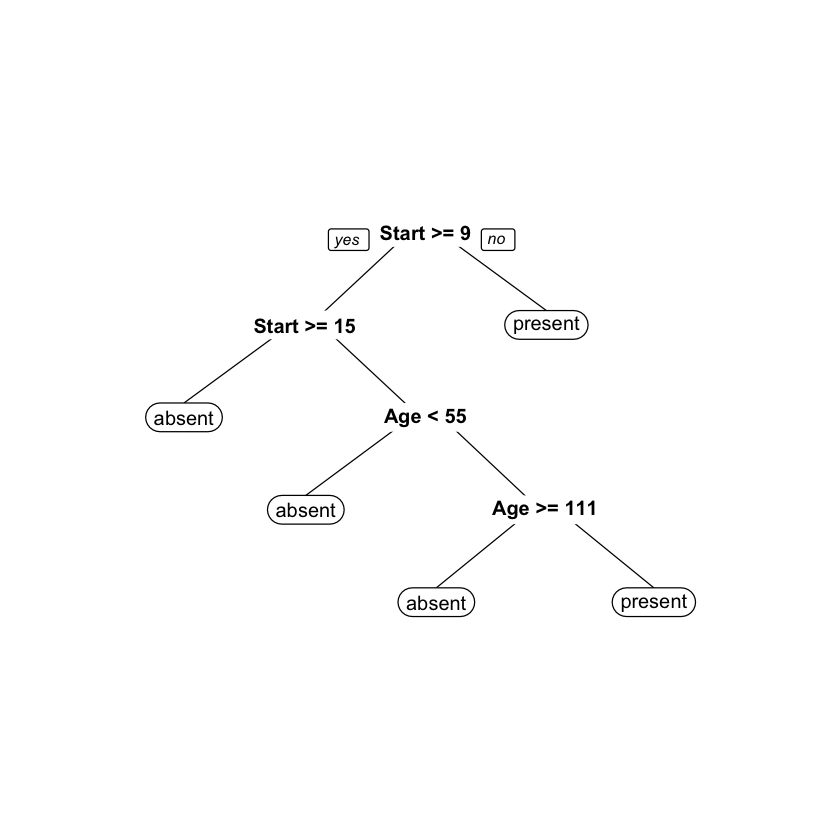

In [28]:
prp(tree)

## Random Forests

Random forests improve predictive accuracy by generating a large number of bootstrapped trees (based on random samples of variables), classifying a case using each tree in this new "forest", and deciding a final predicted outcome by combining the results across all of the trees (an average in regression, a majority vote in classification).

We can use the randomForest library to create and build out a Random Forest:

In [29]:
library(randomForest)

In [30]:
model <- randomForest(Kyphosis ~ .,   data=kyphosis)

In [31]:
# view results
print(model) 


Call:
 randomForest(formula = Kyphosis ~ ., data = kyphosis) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 22.22%
Confusion matrix:
        absent present class.error
absent      59       5   0.0781250
present     13       4   0.7647059


In [32]:
# importance of each predictor
importance(model)

,MeanDecreaseGini
Age,8.442028
Number,5.449983
Start,10.283552


# Project on Decision Trees Model

In [34]:
#install.packages("ISLR")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [35]:
library(ISLR)

In [38]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


**We will predict whether the College is a Public or Private Institution**

In [40]:
df <- College

In [41]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



### EDA

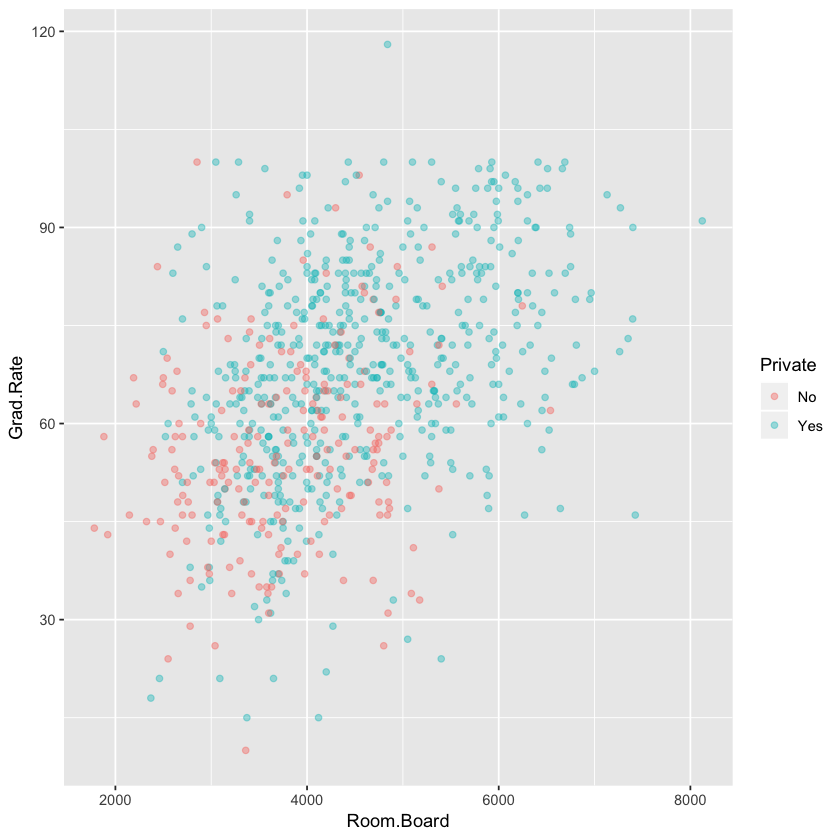

In [45]:
ggplot(df,aes(Room.Board,Grad.Rate)) + geom_point(aes(color=Private),alpha=0.4)

**As the Room and Board Cost increases, the Grad.Rate is also increasing and they are Private Institutions.**

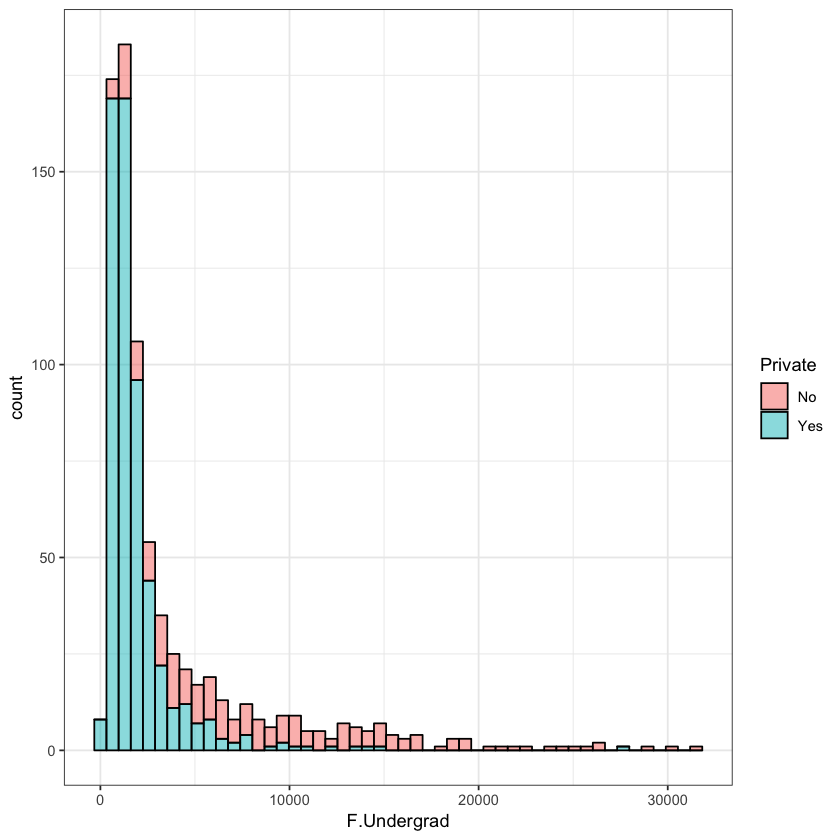

In [47]:
ggplot(df,aes(F.Undergrad)) + geom_histogram(aes(fill=Private),color='black', bins=50,alpha = 0.5)+theme_bw()

**Most smaller Institutions are Private with around 5000 Undergrad students.**

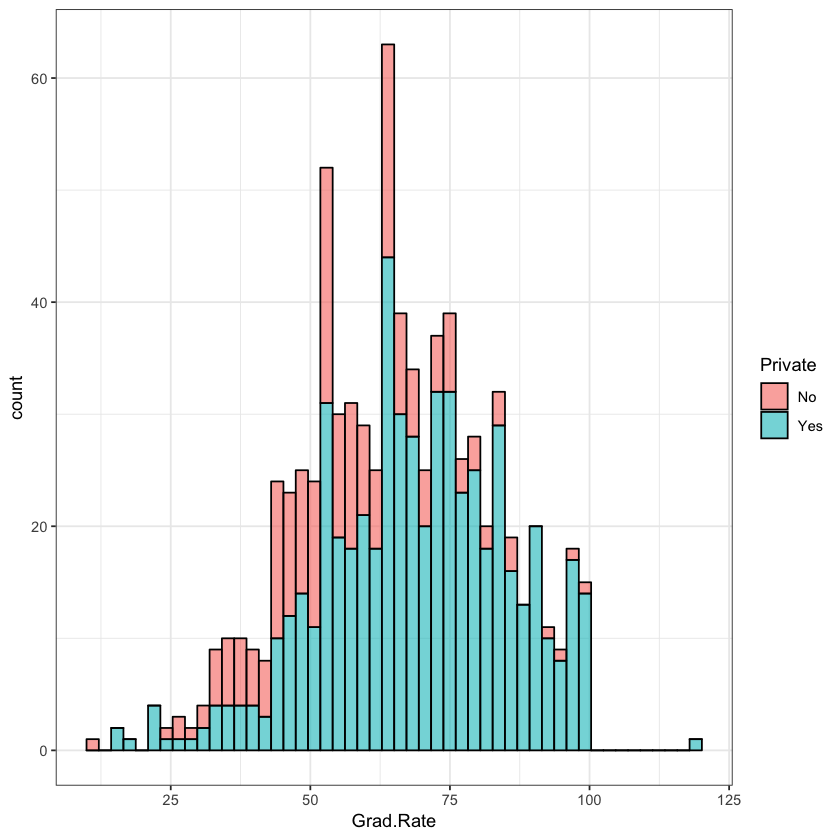

In [48]:
ggplot(df,aes(Grad.Rate)) + geom_histogram(aes(fill=Private),color='black', bins=50,alpha = 0.6)+theme_bw()

**NOTE- There is a college with more than 100% graduation rate! Lets find out**

In [49]:
subset(df,Grad.Rate>100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [50]:
df['Cazenovia College','Grad.Rate'] <-100

In [51]:
subset(df,Grad.Rate>100)
# Success in changing the grad.rate in 100%

Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [52]:
library(caTools)

In [53]:
set.seed(101)

In [55]:
sample <- sample.split(df$Private, SplitRatio=0.70)

In [56]:
train <- subset(df,sample==T)

In [57]:
test <- subset(df, sample ==F)

In [58]:
tree <- rpart(Private ~ .,method='class', data=train)

In [59]:
summary(tree)

Call:
rpart(formula = Private ~ ., data = train, method = "class")
  n= 544 

          CP nsplit rel error    xerror       xstd
1 0.48648649      0 1.0000000 1.0000000 0.07013217
2 0.21621622      1 0.5135135 0.6081081 0.05855824
3 0.02702703      2 0.2972973 0.3918919 0.04863747
4 0.02027027      3 0.2702703 0.4054054 0.04936705
5 0.01000000      8 0.1554054 0.4121622 0.04972529

Variable importance
F.Undergrad      Enroll      Accept        Apps    Outstate P.Undergrad 
         17          15          13          11          10           8 
  S.F.Ratio  Room.Board      Expend   Grad.Rate   Top10perc   Top25perc 
          7           5           4           4           3           1 

Node number 1: 544 observations,    complexity param=0.4864865
  predicted class=Yes  expected loss=0.2720588  P(node) =1
    class counts:   148   396
   probabilities: 0.272 0.728 
  left son=2 (164 obs) right son=3 (380 obs)
  Primary splits:
      F.Undergrad < 2992.5  to the right, improve=94.012

In [60]:
tree.preds <- predict(tree,test)

In [61]:
head(tree.preds)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


**We have a probability of Yes or No. But we need a confusion Matrix with one column.**

In [62]:
tree.preds <- as.data.frame(tree.preds)

In [63]:
joiner <-function(x){
    if (x>= 0.5){
        return('Yes')
    }else{
        return('No')
    }
}

In [64]:
tree.preds$Private <- sapply(tree.preds$Yes,joiner)
print(head(tree.preds))

                                                 No       Yes Private
Adrian College                          0.003311258 0.9966887     Yes
Alfred University                       0.003311258 0.9966887     Yes
Allegheny College                       0.003311258 0.9966887     Yes
Allentown Coll. of St. Francis de Sales 0.003311258 0.9966887     Yes
Alma College                            0.003311258 0.9966887     Yes
Amherst College                         0.003311258 0.9966887     Yes


In [65]:
table(tree.preds$Private,test$Private)

     
       No Yes
  No   57   9
  Yes   7 160

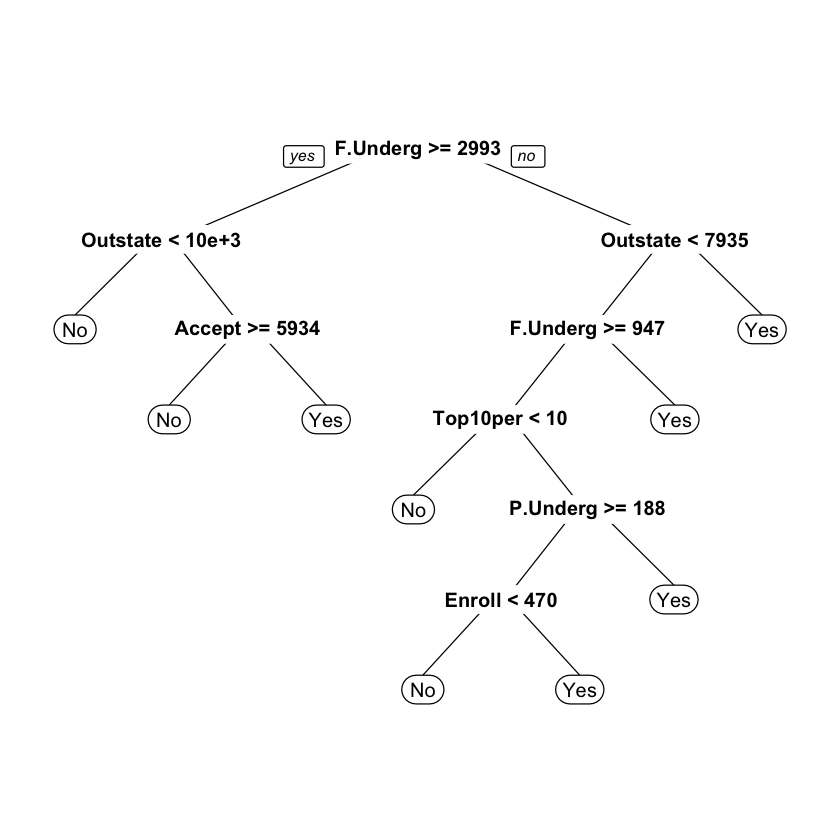

In [66]:
prp(tree)

### Using Random Forest Models

In [67]:
library(randomForest)

In [68]:
rf.model <- randomForest(Private ~ ., data =train, importance=TRUE)

In [69]:
rf.model$confusion

,No,Yes,class.error
No,128,20,0.13513514
Yes,11,385,0.02777778


In [70]:
rf.model$importance

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.0264825723,1.337054e-02,0.0167996115,9.827595
Accept,0.0266512523,1.350260e-02,0.0170035344,11.883250
Enroll,0.0321939269,2.745828e-02,0.0287445317,20.307245
Top10perc,0.0092354552,4.178847e-03,0.0055778027,5.525514
Top25perc,0.0072526625,3.441528e-03,0.0044470666,4.352324
F.Undergrad,0.1482062370,7.223168e-02,0.0927247390,42.406669
P.Undergrad,0.0375883049,5.652122e-03,0.0143648091,14.677097
Outstate,0.1463307045,6.605948e-02,0.0874811571,43.328004
Room.Board,0.0186034224,1.360015e-02,0.0150377245,11.560456
Books,0.0005445485,2.386036e-05,0.0001481889,2.355311


In [71]:
rf.preds <-predict(rf.model,test)

In [73]:
table(rf.preds,test$Private)

        
rf.preds  No Yes
     No   56   5
     Yes   8 164

**Overall, The Random Forest Model performed better but it depends on what type of Error we are trying to eliminate(Type1 or Type2)**